In [1]:
import ROOT
ROOT.gROOT.Macro("rootlogon.C")

Welcome to JupyROOT 6.10/04


0L

In [1]:


from Unfolder import *




ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.0, "Y");
ROOT.gStyle.SetPadRightMargin(0.15)
ROOT.gStyle.SetTitleFont(43,"XYZ")
ROOT.gStyle.SetTitleSize(30,"XYZ")
ROOT.gStyle.SetTitleOffset(1.0, "X")
ROOT.gStyle.SetTitleOffset(0.8, "Y")
ROOT.gStyle.SetLabelFont(43,"XYZ")
ROOT.gStyle.SetLabelSize(22,"XYZ")

ROOT.gSystem.Load("RooUnfold/libRooUnfold")

lumi = 2.3e3

infile = "2DData_expunc.root"



Welcome to JupyROOT 6.10/04


In [2]:
pythia = ROOT.TFile(infile)

In [3]:
#softdropstr = "_softdrop"
softdropstr = ""

In [4]:
nom = pythia.Get("2d_response" + softdropstr).Hreco()
nom.Scale(1.0 / nom.Integral())
jecsrcs = []

for i in xrange(53): 
    jecsrcs.append( [pythia.Get('2d_response' + softdropstr + '_jecsrc'+str(i)+'up').Hreco(), 
                     pythia.Get('2d_response' + softdropstr + '_jecsrc'+str(i)+'dn').Hreco()] )
    jecsrcs[i][0].Scale(1.0 /jecsrcs[i][0].Integral() )
    jecsrcs[i][1].Scale(1.0 /jecsrcs[i][1].Integral() )
    jecsrcs[i][0].Add( nom, -1.0 )
    jecsrcs[i][1].Add( nom, -1.0 )
    jecsrcs[i][0].Divide( nom )
    jecsrcs[i][1].Divide( nom )

In [5]:
projsup = []
projsdn = []

for i in xrange(53): 
    ptproj = jecsrcs[i][0].ProjectionX("projyup"+str(i), 3,3)
    ptproj.SetMarkerStyle( 20 + i % 20)
    projsup.append( ptproj )

for i in xrange(53): 
    ptproj = jecsrcs[i][1].ProjectionX("projydn"+str(i), 3,3)
    ptproj.SetMarkerStyle( 20 + i % 20)
    projsdn.append( ptproj )
    
    
    

In [6]:
hup = ROOT.THStack("hup", ";Jet mass (GeV);JEC + Uncertainty")
hdn = ROOT.THStack("hdn", ";Jet mass (GeV);JEC - Uncertainty")

In [7]:
for i in xrange(53):
    hup.Add(projsup[i])
    hdn.Add(projsdn[i])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cup


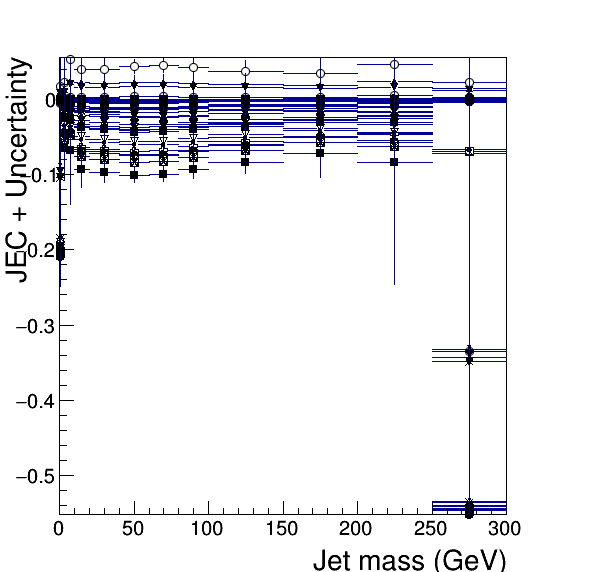

In [10]:
cup = ROOT.TCanvas("cup", "cup", 600,600)

hup.Draw("nostack")

#hup.SetMinimum(-3.0e-2)
#hup.SetMaximum(3.0e-2)
hup.GetXaxis().SetRangeUser(0,300)

cup.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdn


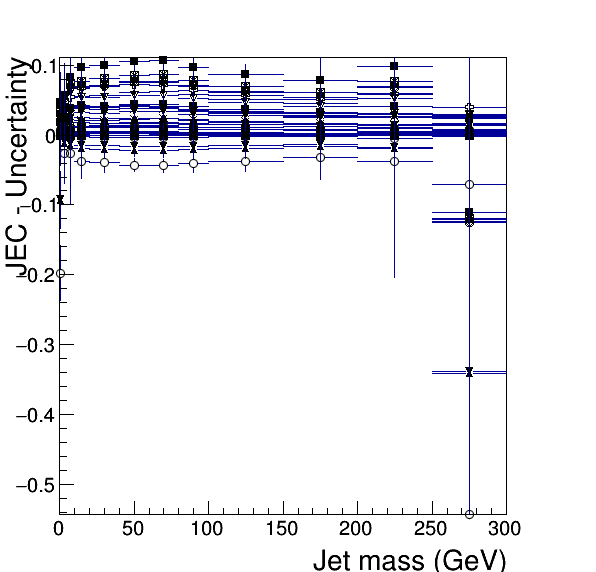

In [11]:
cdn = ROOT.TCanvas("cdn", "cdn", 600,600)

hdn.Draw("nostack")
#hdn.SetMinimum(-3.0e-2)
#hdn.SetMaximum(3.0e-2)
hdn.GetXaxis().SetRangeUser(0,300)

cdn.Draw()